# Importing data set

In [59]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [60]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [61]:
iris.data.shape

(150, 4)

# KNN 

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)    #n_neighbors is k value

In [63]:
x=iris.data
y=iris.target

In [64]:
knn.fit(x,y)  #fit function trains the machine (basically)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [65]:
data_set=[4.7, 3.2, 1.3, 0.2,]  #sample data set 
type_of_spec = knn.predict( [ data_set, [6.3, 3.4, 5.6, 2.4] ] )
print(iris.target_names[type_of_spec])

['setosa' 'virginica']


# Separate data into train and test groups

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.3,random_state=40)

In [67]:
print(X_train.shape)

(105, 4)


In [68]:
print(X_test.shape)

(45, 4)


In [69]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [70]:
predictions = knn.predict(X_test)
print(predictions)

[0 1 2 2 1 2 1 1 1 0 1 0 0 2 1 2 2 2 1 1 2 2 1 0 1 0 0 2 0 1 1 0 0 0 0 2 0
 0 2 0 0 1 2 2 2]


In [71]:
print(Y_test)

[0 1 2 2 1 2 1 1 1 0 1 0 0 2 1 2 2 2 1 1 2 2 1 0 1 0 0 2 0 1 1 0 0 0 0 2 0
 0 2 0 0 1 2 2 2]


In [72]:
from sklearn import metrics
performance = metrics.accuracy_score(Y_test,predictions)
print(performance)

1.0


# Using a loop for k values to get best possible output

In [73]:
k_values = {}
k=1

while k<=25:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    predictions = knn.predict(X_test)
    #performance = metrics.accuracy_score(Y_test,predictions)
    k_values[k] = round(metrics.accuracy_score(Y_test,predictions),3)
    k+=1
print(k_values)

{1: 1.0, 2: 0.978, 3: 1.0, 4: 0.956, 5: 1.0, 6: 0.956, 7: 0.978, 8: 0.956, 9: 0.978, 10: 0.933, 11: 0.956, 12: 0.956, 13: 0.978, 14: 0.978, 15: 0.978, 16: 0.978, 17: 0.978, 18: 0.956, 19: 0.978, 20: 0.933, 21: 0.933, 22: 0.933, 23: 0.933, 24: 0.933, 25: 0.978}


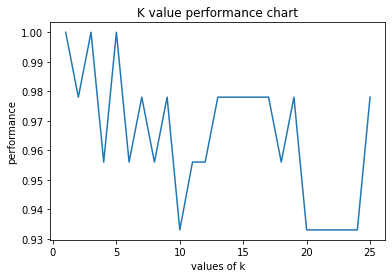

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(k_values.keys()), list(k_values.values()))
plt.title("K value performance chart")
plt.xlabel("values of k")
plt.ylabel("performance")
plt.show()

# Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
print(iris.target_names[logreg.predict([[4.8, 3. , 1.4, 0.1]])])

['setosa']


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [76]:
print(logreg.predict_proba([[6.3, 3.4, 5.6, 2.4]]))

[[0.00100882 0.17055873 0.82843245]]


In [77]:
predictions_logreg = logreg.predict(X_test)
performance_logreg = metrics.accuracy_score(Y_test,predictions_logreg)
print(performance_logreg)

0.9555555555555556
